# Arima model example: non-stationary series

This notebook describes the application of a Box-Jenkins approach to create an ARIMA model for a time series. The idea is to duplicate the procedure here described for other datasets.

In [1]:
%matplotlib inline
%reload_ext rpy2.ipython

import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from pathlib import Path
from sklearn import metrics, model_selection

from fbprophet import Prophet

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/home/ispmarin/lib/venvs/ts/lib/python3.6/site-packages/rpy2/ipython/rmagic.py:73: UserWarning: The Python package 'pandas' is stronglyrecommended when using `rpy2.ipython`. Unfortunately it could not be loaded, but at least we found 'numpy'.
  "but at least we found 'numpy'.")))
/home/ispmarin/lib/venvs/ts/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
dataset_root = Path('/home/ispmarin/profissional/projetos/ts_arima/data')
dataset = 'nist.csv'

data_path = dataset_root / dataset

df = pd.read_csv(data_path)
date_index = pd.date_range('2015-01-01', periods=len(df))
df = df.set_index(date_index)

In [ ]:
def check_adfuller(df, col):
    result = sm.tsa.stattools.adfuller(df[col])
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

### First step: Run sequence plot
The run sequence plot is a standard plot of the time series sequence. 


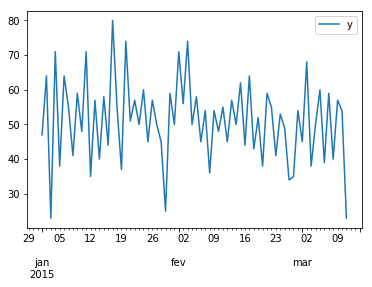

In [143]:
df.plot()

There is a variation on the data

### Second step: Run Autocorrelation plot

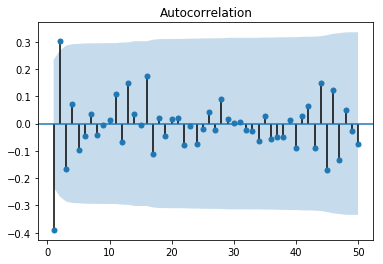

In [144]:
fig = sm.graphics.tsa.plot_acf(df, lags=50, zero=False)

Plot indicates that the series is non-stationary and ARIMA seems to be a good fit. Let's differentiate the series and redo the plots.

### Series differentiation



In [148]:
check_adfuller(df, 'y')

ADF Statistic: -3.161805
p-value: 0.022305
Critical Values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


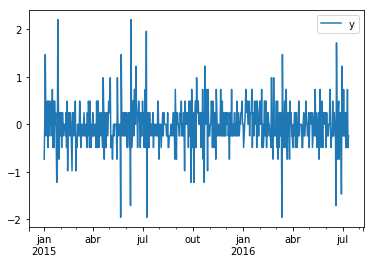

In [39]:
df_diff = df.diff().dropna()
df_diff.plot()

### Autocorrelation of differentiated series

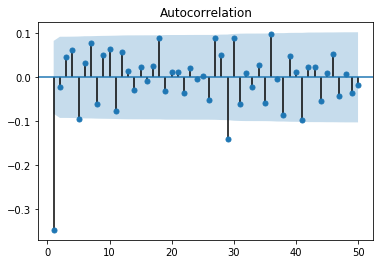

In [40]:
fig = sm.graphics.tsa.plot_acf(df_diff, lags=50, zero=False)

There is a lag with negative correlation of order 1, so this indicates a model of MA(1). The next step is to calculate a partial autocorrelation graph:

### Partial autocorrelation of differentiated series

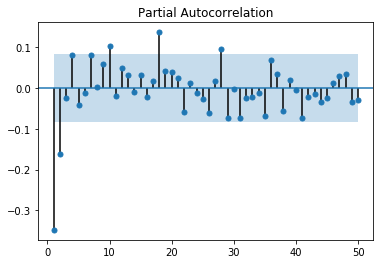

In [41]:
fig = sm.graphics.tsa.plot_pacf(df_diff, lags=50, zero=False)

The first two lags are over 95% confidence band, indicating a AR(2) model.

## Model fit

In [45]:
mdl_210 = sm.tsa.ARIMA(df_diff, (2,0,0)).fit()
mdl_011 = sm.tsa.ARIMA(df_diff, (0,0,1)).fit()

In [46]:
mdl_210.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  558
Model:                     ARMA(2, 0)   Log Likelihood                -336.550
Method:                       css-mle   S.D. of innovations              0.442
Date:                sex, 20 abr 2018   AIC                            681.100
Time:                        16:36:46   BIC                            698.397
Sample:                    01-02-2015   HQIC                           687.855
                         - 07-12-2016                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0050      0.012     -0.418      0.676      -0.028       0.018
ar.L1.y       -0.4064      0.042     -9.710      0.000      -0.488      -0.324
ar.L2.y       -0.1649      0.042     -3.941      0.000      -0.247      -0.083
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2321           -2.1321j            2.4625           -0.3334
AR.2           -1.2321           +2.1321j            2.4625            0.3334
-----------------------------------------------------------------------------
"""

In [47]:
mdl_011.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  558
Model:                     ARMA(0, 1)   Log Likelihood                -337.996
Method:                       css-mle   S.D. of innovations              0.443
Date:                sex, 20 abr 2018   AIC                            681.992
Time:                        16:36:49   BIC                            694.965
Sample:                    01-02-2015   HQIC                           687.059
                         - 07-12-2016                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0051      0.011     -0.448      0.654      -0.028       0.017
ma.L1.y       -0.3921      0.037    -10.724      0.000      -0.464      -0.320
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            2.5501           +0.0000j            2.5501            0.0000
-----------------------------------------------------------------------------
"""

### Checking differentiation parameter

In [ ]:
mdl_210 = sm.tsa.ARIMA(df, (2,1,0)).fit()
mdl_011 = sm.tsa.ARIMA(df, (0,1,1)).fit()

In [50]:
mdl_210.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  558
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -337.996
Method:                       css-mle   S.D. of innovations              0.443
Date:                sex, 20 abr 2018   AIC                            681.992
Time:                        16:43:36   BIC                            694.965
Sample:                    01-02-2015   HQIC                           687.059
                         - 07-12-2016                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0051      0.011     -0.448      0.654      -0.028       0.017
ma.L1.D.y     -0.3921      0.037    -10.724      0.000      -0.464      -0.320
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            2.5501           +0.0000j            2.5501            0.0000
-----------------------------------------------------------------------------
"""

In [51]:
mdl_011.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  558
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -337.996
Method:                       css-mle   S.D. of innovations              0.443
Date:                sex, 20 abr 2018   AIC                            681.992
Time:                        16:43:40   BIC                            694.965
Sample:                    01-02-2015   HQIC                           687.059
                         - 07-12-2016                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0051      0.011     -0.448      0.654      -0.028       0.017
ma.L1.D.y     -0.3921      0.037    -10.724      0.000      -0.464      -0.320
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            2.5501           +0.0000j            2.5501            0.0000
-----------------------------------------------------------------------------
"""

## Prediction

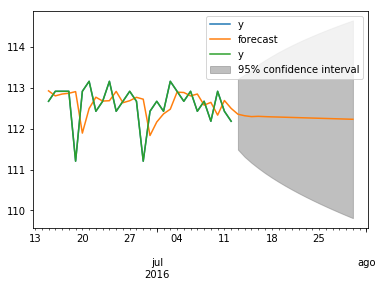

In [67]:
ax = df['2016-06-15':].plot()
_ = mdl_210.plot_predict(start='2016-06-15', end='2016-07-30', ax=ax)

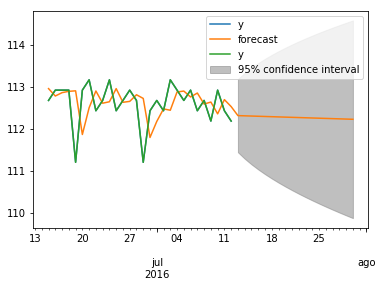

In [68]:
ax = df['2016-06-15':].plot()
_ = mdl_011.plot_predict(start='2016-06-15', end='2016-07-30', ax=ax)

### Error evaluation

In [104]:
def ts_splitter(df, test_size = 0.3):
    index_split = int(np.floor(len(df)*(1-test_size)))
    return df.iloc[:index_split], df.iloc[index_split:]

In [136]:
df_train, df_test = ts_splitter(df,0.3)

10.923089347424634


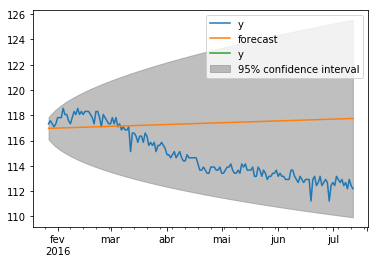

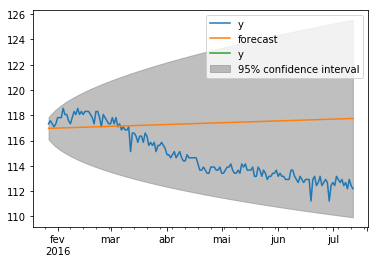

In [137]:
mdl_err = sm.tsa.ARIMA(df_train, (2,1,0)).fit()
y_hat = mdl_err.predict(start=df_test.index.min(), end=df_test.index.max(), typ='levels')
print(metrics.mean_squared_error(df_test.y.values, y_hat.values))
ax = df_test.plot()
mdl_err.plot_predict(start=df_test.index.min(), end=df_test.index.max(),ax=ax)

10.763302215758097


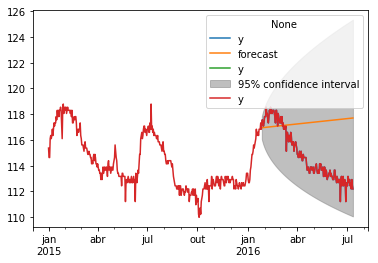

In [138]:
mdl_err = sm.tsa.ARIMA(df_train, (0,1,1)).fit()
y_hat = mdl_err.predict(start=df_test.index.min(), end=df_test.index.max(), typ='levels')
print(metrics.mean_squared_error(df_test.y.values, y_hat.values))
ax = df_test.plot()
mdl_err.plot_predict(start=df_test.index.min(), end=df_test.index.max(),ax=ax)
df.plot(ax=ax)

# Prophet

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


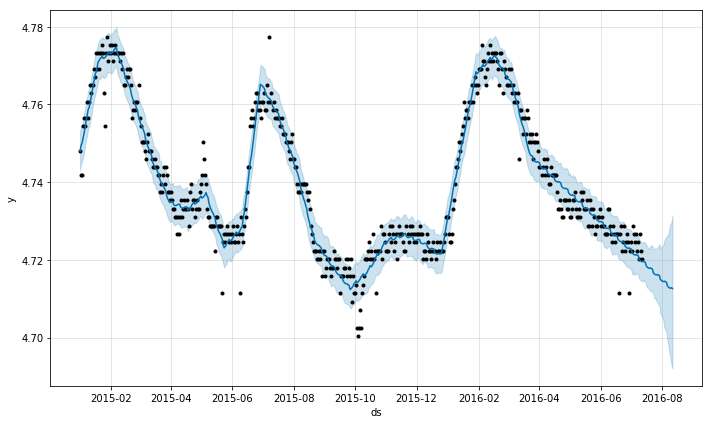

In [3]:
df_ln = np.log(df)
df_ln['ds'] = df_ln.index

mdl_prophet = Prophet()
mdl_prophet.fit(df_ln)

future = mdl_prophet.make_future_dataframe(periods=30)
forecast = mdl_prophet.predict(future)

_ = mdl_prophet.plot(forecast)

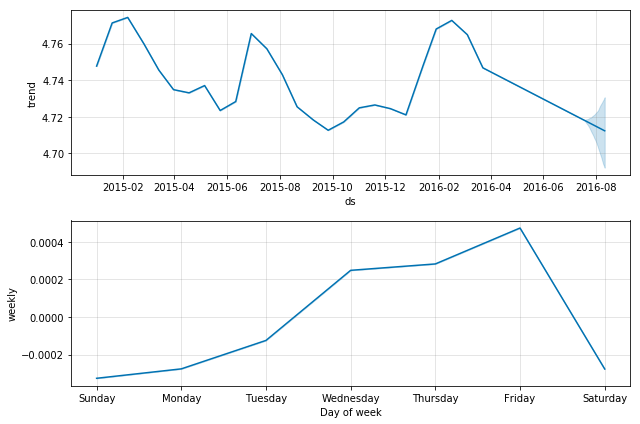

In [4]:
_ = mdl_prophet.plot_components(forecast)

# R

In [15]:
%%R
library(forecast)
library(ggplot2)

df <- read.csv('../data/nist.csv')
auto.arima(df)

Series: df 
ARIMA(4,1,0) 

Coefficients:
          ar1      ar2     ar3     ar4
      -0.4078  -0.1585  0.0159  0.0868
s.e.   0.0422   0.0456  0.0462  0.0428

sigma^2 estimated as 0.1955:  log likelihood=-334.48
AIC=678.95   AICc=679.06   BIC=700.57


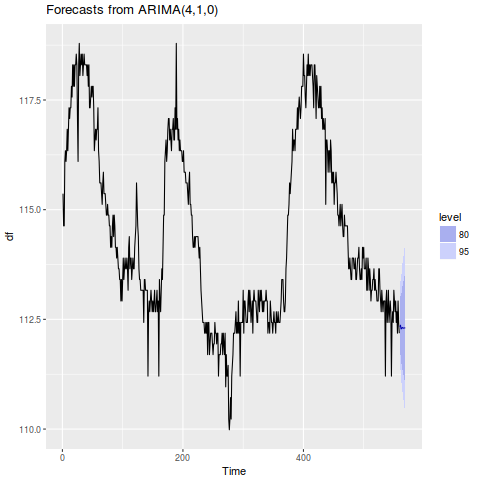

In [16]:
%%R
mdl_r = auto.arima(df)
y_hat = forecast(mdl_r)
autoplot(y_hat)